In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Principal Component Analysis

Principal Component Analysis is a dimensionality reduction technique that transforms data into a lower-dimensional space while preserving its key patterns and variability. It identifies the most important directions of variation, called principal components, and projects the data onto them. This simplifies complex datasets, aids visualization, and speeds up machine learning algorithms.

[StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://youtu.be/FgakZw6K1QQ?si=yMAIxT64qLAX35ef)

In [21]:
link = 'https://raw.githubusercontent.com/daaanishhh002/MachineLearning/main/Datasets/digits.csv'
df = pd.read_csv(link).dropna()

df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 785 columns]

In [22]:
df.shape

(7133, 785)

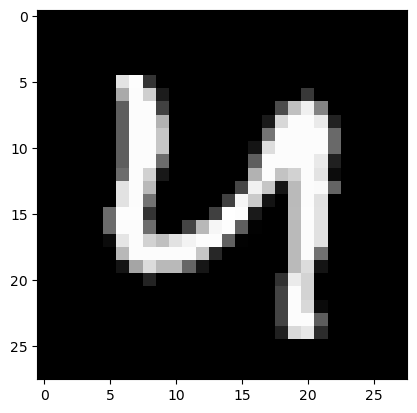

In [23]:
plt.imshow(df.iloc[168,1:].values.reshape(28,28),cmap='binary_r');

In [34]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2002)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9355140186915888

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=392)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf.shape

(4993, 392)

In [49]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9425233644859813

In [51]:
pca = PCA(n_components=2)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

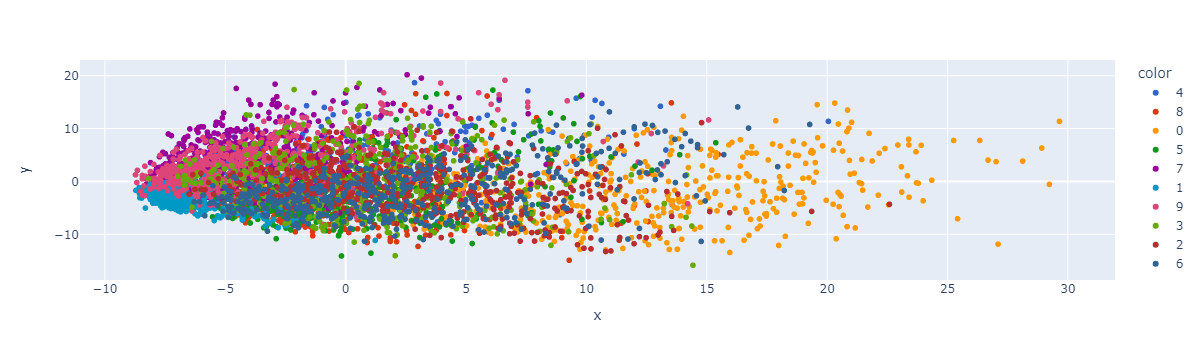

In [52]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [53]:
pca = PCA(n_components=3)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

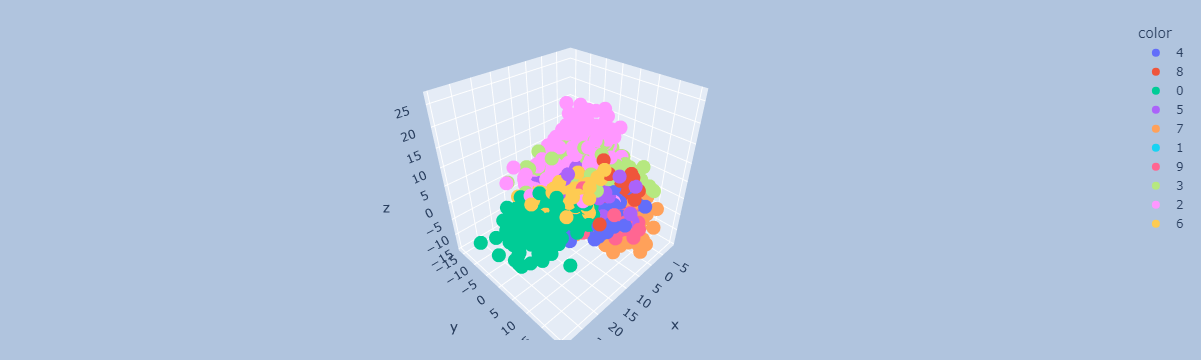

In [54]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [60]:
# eigen values
pca.explained_variance_

array([40.87424505, 28.27005113, 27.71866502])

In [61]:
# eigen vectors
pca.components_

array([[ 4.06480535e-18,  1.14097905e-18,  8.52729004e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.88073732e-17, -2.54128657e-17, -1.44145460e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.23705186e-16, -1.86774695e-17,  3.40089861e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [57]:
pca.components_.shape

(3, 784)

In [62]:
pca.explained_variance_ratio_

array([0.06210647, 0.042955  , 0.04211719])

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [66]:
pca.explained_variance_ratio_

array([6.21064723e-02, 4.29549996e-02, 4.21171966e-02, 3.21660301e-02,
       2.76005995e-02, 2.41426667e-02, 2.04983671e-02, 1.95729597e-02,
       1.69411366e-02, 1.51996773e-02, 1.46422646e-02, 1.30091430e-02,
       1.25012324e-02, 1.23019576e-02, 1.14613166e-02, 1.11870957e-02,
       1.04235420e-02, 1.03575343e-02, 9.92332940e-03, 9.59396039e-03,
       9.39955001e-03, 8.67625160e-03, 8.32843538e-03, 8.10927642e-03,
       7.96469603e-03, 7.60174239e-03, 7.48463982e-03, 7.19056465e-03,
       7.17842530e-03, 6.84276525e-03, 6.59863388e-03, 6.53681646e-03,
       6.51158741e-03, 6.24939164e-03, 6.23207076e-03, 6.06366527e-03,
       5.92454450e-03, 5.74406214e-03, 5.72311222e-03, 5.64357201e-03,
       5.48071246e-03, 5.41875582e-03, 5.27166105e-03, 5.20211158e-03,
       4.98816497e-03, 4.92756959e-03, 4.89172217e-03, 4.74674486e-03,
       4.66498232e-03, 4.60160644e-03, 4.57103940e-03, 4.51094890e-03,
       4.44060138e-03, 4.34028929e-03, 4.29155936e-03, 4.16474190e-03,
      

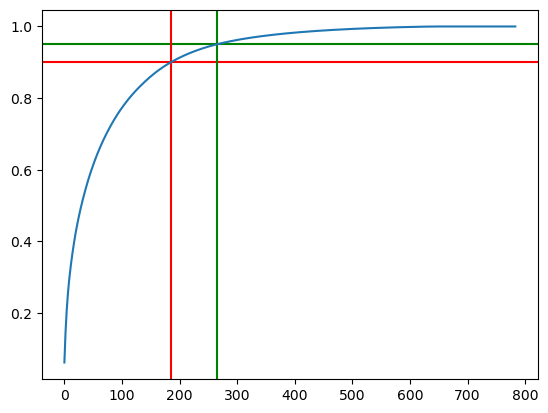

In [113]:
plt.axhline(0.9,c='r')
plt.axhline(0.95,c='g')
plt.axvline(185,c='r')
plt.axvline(265,c='g')
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [104]:
explained_var = pd.Series(np.cumsum(pca.explained_variance_ratio_),index=range(1,785))
explained_var

1      0.062106
2      0.105061
3      0.147179
4      0.179345
5      0.206945
         ...   
780    1.000000
781    1.000000
782    1.000000
783    1.000000
784    1.000000
Length: 784, dtype: float64

In [114]:
mask = (explained_var >= 0.9)
explained_var[mask]

186    0.900227
187    0.901143
188    0.902049
189    0.902939
190    0.903826
         ...   
780    1.000000
781    1.000000
782    1.000000
783    1.000000
784    1.000000
Length: 599, dtype: float64